# <font color='blue'>  ***Vision Dataset (Pneumonia classification): LTI*** </font>

---

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

#create a kaggle folder
! mkdir ~/.kaggle
#copy the Kaggle.json file into Kaggle folder
!cp kaggle.json ~/.kaggle/

#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Saving kaggle.json to kaggle.json
100% 2.29G/2.29G [00:28<00:00, 40.5MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.1MB/s]


In [ ]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import pathlib
# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle datasets download -d paultimothymooney/chest-xray-pneumonia'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#to handle .DS_Store 'hidden files'
train = 'chest_xray/chest_xray/train/NORMAL'
train_P = 'chest_xray/chest_xray/train/PNEUMONIA'
test = 'chest_xray/chest_xray/test/NORMAL'
test_P = 'chest_xray/chest_xray/test/PNEUMONIA'
val = 'chest_xray/chest_xray/val/NORMAL'
val_P = 'chest_xray/chest_xray/val/PNEUMONIA'

train = pathlib.Path(train)
train_P = pathlib.Path(train_P)
test = pathlib.Path(test)
test_P = pathlib.Path(test_P)
val = pathlib.Path(val)
val_P = pathlib.Path(val_P)

# for item in train.glob("*"):
#   print(item.name)

In [ ]:
list_ds_N = tf.data.Dataset.list_files(str(train/'*.jpeg'))
list_ds_P = tf.data.Dataset.list_files(str(train_P/'*.jpeg'))

list_ds_test_N = tf.data.Dataset.list_files(str(test/'*.jpeg'))
list_ds_test_P = tf.data.Dataset.list_files(str(test_P/'*.jpeg'))

list_ds_val_N = tf.data.Dataset.list_files(str(val/'*.jpeg'))
list_ds_val_P = tf.data.Dataset.list_files(str(val_P/'*.jpeg'))

for f in list_ds_P.take(5):
  print(f.numpy())

b'chest_xray/chest_xray/train/PNEUMONIA/person758_bacteria_2662.jpeg'
b'chest_xray/chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg'
b'chest_xray/chest_xray/train/PNEUMONIA/person803_bacteria_2710.jpeg'
b'chest_xray/chest_xray/train/PNEUMONIA/person700_bacteria_2599.jpeg'
b'chest_xray/chest_xray/train/PNEUMONIA/person292_virus_599.jpeg'


In [ ]:
list_ds = list_ds_N.concatenate(list_ds_P)
list_ds_test = list_ds_test_N.concatenate(list_ds_test_P)
list_ds_val = list_ds_val_N.concatenate(list_ds_val_P)

In [ ]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(file_path, '/')
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_image(image, expand_animations = False)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [150, 150])
  return image, label


def show(image, label):
  plt.figure()
  plt.imshow( tf.squeeze(image))
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

## <font color='blue'>  **Data Visualization and augmentation** </font>

#### <font color='magenta'>  ***Plot at least two samples from each class of the dataset*** </font>

#### <font color='magenta'>  **Ploting sample data from training data set**</font>

Ploting sample dataset from Training data
------------------


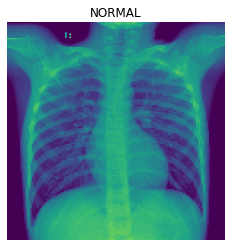

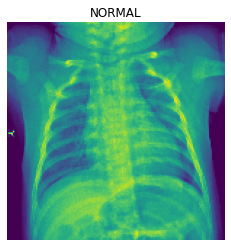

In [ ]:
print('Ploting sample dataset from Training data')

file_path = next(iter(list_ds))
image, label = parse_image(file_path)
show(image, label)
print("------------------")
file_path = next(iter(list_ds))
image, label = parse_image(file_path)
show(image, label)

####<font color='magenta'>  **Ploting sample data from testing data set** </font>

Ploting sample dataset from Testing data
------------------


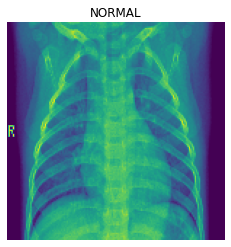

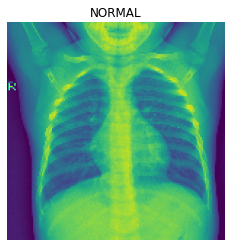

In [ ]:
print('Ploting sample dataset from Testing data')

file_path = next(iter(list_ds_test))
image, label = parse_image(file_path)
show(image, label)
print("------------------")
file_path = next(iter(list_ds_test))
image, label = parse_image(file_path)
show(image, label)

#### <font color='magenta'>  **Ploting sample data from validation data set** </font>

Ploting sample dataset from validation data
------------------


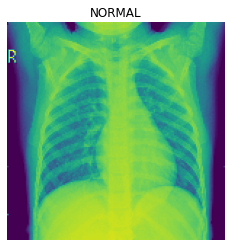

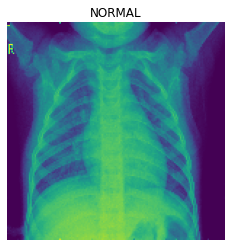

In [ ]:
print('Ploting sample dataset from validation data')

file_path = next(iter(list_ds_val))
image, label = parse_image(file_path)
show(image, label)
print("------------------")
file_path = next(iter(list_ds_val))
image, label = parse_image(file_path)
show(image, label)

<font color='magenta'>  ***Bringing the train and test data in the required format.*** </font>

In [ ]:
# Reading and Parsing the dataset 
images_ds = list_ds.map(parse_image)
images_ds_test = list_ds_test.map(parse_image)
images_ds_val = list_ds_val.map(parse_image)

### <font color='magenta'>  ***Apply rotation and height shift augmentatio*** </font>

In [ ]:
# defining rotate and shift function

import scipy.ndimage as ndimage
def random_rotate_image(image):
  image =  ndimage.rotate(image, np.random.uniform(-30,30), reshape=False)
  return image

def random_shift_image(image):
  image =  ndimage.shift(image, shift = 0.080)
  return image

<font color='magenta'>  ***Ploting sample data post rotation and height shift on training data*** </font>

Ploting sample dataset from Training data post rotation
Ploting sample dataset from Training data
---------------------------------
Ploting sample dataset from Training data post rotation
Ploting sample dataset from Training data


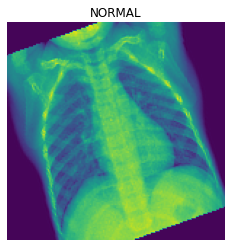

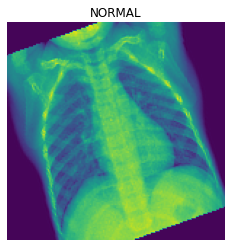

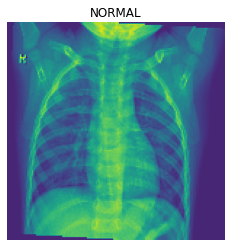

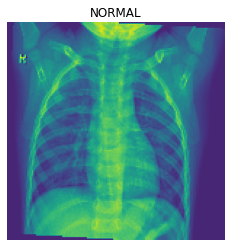

In [ ]:
print('Ploting sample dataset from Training data post rotation')

image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)
print('Ploting sample dataset from Training data')
show(image, label)

print("---------------------------------")
print('Ploting sample dataset from Training data post rotation')

image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

print('Ploting sample dataset from Training data')
show(image, label)


Ploting sample dataset from Testing data post rotation
Ploting sample dataset from test data
---------------------------------
Ploting sample dataset from Testing data post rotation
Ploting sample dataset from test data


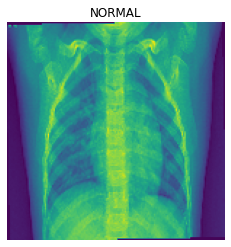

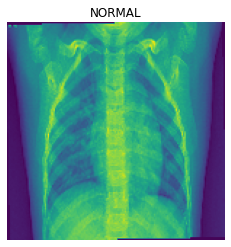

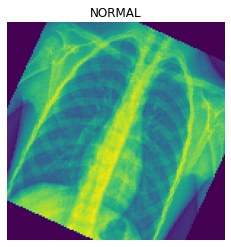

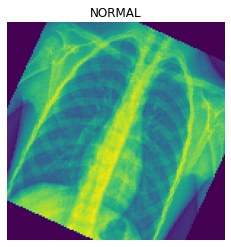

In [ ]:
print('Ploting sample dataset from Testing data post rotation')

image, label = next(iter(images_ds_test))
image = random_rotate_image(image)
show(image, label)
print('Ploting sample dataset from test data')
show(image, label)

print("---------------------------------")
print('Ploting sample dataset from Testing data post rotation')

image, label = next(iter(images_ds_test))
image = random_rotate_image(image)
show(image, label)

print('Ploting sample dataset from test data')
show(image, label)


Ploting sample dataset from validation data post rotation
Ploting sample dataset from validation data
---------------------------------
Ploting sample dataset from validation data post rotation
Ploting sample dataset from validation data


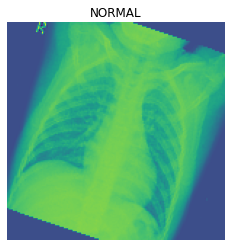

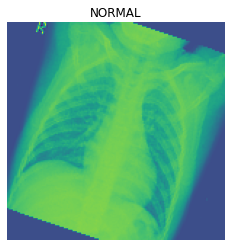

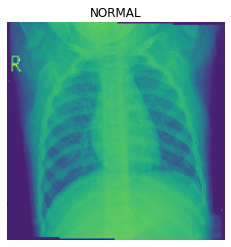

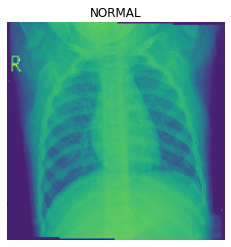

In [ ]:
print('Ploting sample dataset from validation data post rotation')

image, label = next(iter(images_ds_val))
image = random_rotate_image(image)
show(image, label)
print('Ploting sample dataset from validation data')
show(image, label)

print("---------------------------------")
print('Ploting sample dataset from validation data post rotation')

image, label = next(iter(images_ds_val))
image = random_rotate_image(image)
show(image, label)

print('Ploting sample dataset from validation data')
show(image, label)


In [ ]:
# def tf_random_rotate_image(image, label):
#   im_shape = image.shape
#   [image,]= tf.py_function(random_rotate_image, [image], [tf.float32])
#   image.set_shape(im_shape)
#   return image, label

# rot_ds = images_ds.map(tf_random_rotate_image)
# rot_ds_test = images_ds_test.map(tf_random_rotate_image)
# rot_ds_val = images_ds_val.map(tf_random_rotate_image)


In [ ]:
# image, label = next(iter(rot_ds_test))
# plt.figure(figsize = (5,5))
# plt.imshow(tf.squeeze(image), cmap='gray')
# plt.title(label)

# image, label = next(iter(rot_ds_val))
# plt.figure(figsize = (5,5))
# plt.imshow(tf.squeeze(image), cmap='gray')
# plt.title(label)

####<font color='magenta'>  **Print the shapes of train and test data.** </font>

In [ ]:
image, label = next(iter(images_ds))
print('shape of the training data', len(list_ds), image.shape[0])
print("-----------------------------------------")
image, label = next(iter(images_ds_test))
print('shape of the testing data', len(list_ds_test), image.shape[0])
print("-----------------------------------------")
image, label = next(iter(images_ds_val))
print('shape of the validation data', len(list_ds_val), image.shape[0])

shape of the training data 5216 150
-----------------------------------------
shape of the testing data 624 150
-----------------------------------------
shape of the validation data 16 150


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('chest_xray/chest_xray/train/')
test = get_training_data('chest_xray/chest_xray/test/')
val = get_training_data('chest_xray/chest_xray/val/')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# y_train = np.array(y_train)
# y_val = np.array(y_val)
# y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

Xtrain = x_train.reshape((5216, 150*150)) 
Xtest = x_test.reshape((624, 150*150)) 
Xval = x_val.reshape((16, 150*150)) 

# <font color='blue'>  ***Model building*** </font>

In [ ]:
# Create a model object
from keras.layers import Dropout

tf.keras.backend.clear_session()  #clear old tf seesion and models
dnnModel = models.Sequential()
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (150*150,), kernel_regularizer='l2'))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer='l2'))
# dropout in hidden layers with weight constraint
dnnModel.add(Dropout(0.2))
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu', kernel_regularizer='l2'))

# Layer 4 = output layer
dnnModel.add(layers.Dense(2, activation='softmax', kernel_regularizer='l2'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1125050   
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,130,002
Trainable params: 1,130,002
Non-trainable params: 0
_________________________________________________________________


#<font color='blue'>  ***Model Compilation*** </font>

In [ ]:
dnnModel.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy', 'mse'] )

#<font color='blue'>  ***Model Training*** </font>

In [ ]:
import datetime
t1 = datetime.datetime.now()
h  = dnnModel.fit( Xtrain, y_train, batch_size=64, validation_data = (Xtest, y_test), epochs=200)
t2 = datetime.datetime.now()


Epoch 1/200
82/82 [==============================] - 3s 29ms/step - loss: 1.8098 - accuracy: 0.8127 - mse: 0.1363 - val_loss: 1.5892 - val_accuracy: 0.7484 - val_mse: 0.1906
Epoch 2/200
82/82 [==============================] - 2s 26ms/step - loss: 1.0375 - accuracy: 0.8854 - mse: 0.0845 - val_loss: 1.0381 - val_accuracy: 0.7756 - val_mse: 0.1428
Epoch 3/200
82/82 [==============================] - 2s 26ms/step - loss: 0.7184 - accuracy: 0.9218 - mse: 0.0572 - val_loss: 1.4043 - val_accuracy: 0.7003 - val_mse: 0.2517
Epoch 4/200
82/82 [==============================] - 2s 27ms/step - loss: 0.6008 - accuracy: 0.9260 - mse: 0.0547 - val_loss: 1.1106 - val_accuracy: 0.7308 - val_mse: 0.2164
Epoch 5/200
82/82 [==============================] - 4s 43ms/step - loss: 0.5104 - accuracy: 0.9363 - mse: 0.0466 - val_loss: 0.7531 - val_accuracy: 0.8077 - val_mse: 0.1360
Epoch 6/200
82/82 [==============================] - 3s 38ms/step - loss: 0.4986 - accuracy: 0.9277 - mse: 0.0543 - val_loss: 1.27

#### **summarize history for accuracy and loss**

In [ ]:
print('time taken by the model', t2-t1)

time taken by the model 0:06:26.746463


In [ ]:
# summarize history for accuracy
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

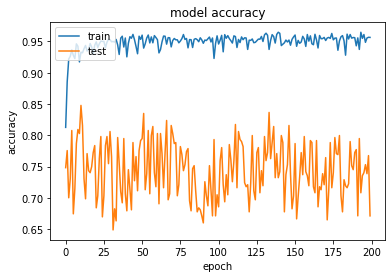

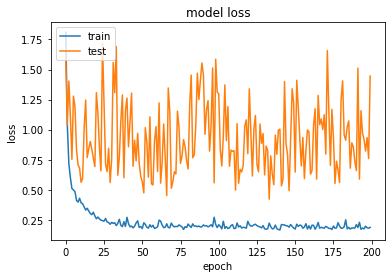

In [ ]:
plot_acc(h)
plot_loss(h)

#<font color='blue'>  ***Model Evaluation*** </font>

In [ ]:
#prediction
result = dnnModel.predict(Xval)
print(result.shape)

result = pd.DataFrame(result)
result.columns = ['proba1', 'proba2']
result['output'] = result['proba1'].apply(lambda x : 1 if x >= 0.50 else 0)
result.head()

(16, 2)


,proba1,proba2,output
0,0.998612,0.001388,1
1,0.996382,0.003618,1
2,0.997664,0.002336,1
3,0.995824,0.004176,1
4,0.998222,0.001778,1


In [ ]:
yval = pd.DataFrame(y_val)
yval.columns = ['trueval1', 'trueval2']
yval = yval[['trueval1']]

In [ ]:
yval.head()

,trueval1
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


#<font color='blue'>  ***Model confusion matrix report*** </font>

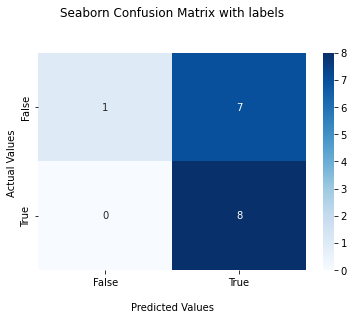

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yval['trueval1'], result['output'])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#<font color='blue'>  ***Model classification report*** </font>

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class pneumonia', 'class normal']
print(classification_report(yval['trueval1'], result['output'], target_names=target_names))

                 precision    recall  f1-score   support

class pneumonia       1.00      0.12      0.22         8
   class normal       0.53      1.00      0.70         8

       accuracy                           0.56        16
      macro avg       0.77      0.56      0.46        16
   weighted avg       0.77      0.56      0.46        16



#<font color='blue'>  ***Hyperparameter Tuning*** </font>

1. Optimiser: Use a different optimizer with the appropriate LR value.

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
# Create a model object
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
import math
import random
import numpy as np

tf.keras.backend.clear_session()  #clear old tf seesion and models
dnnModel = models.Sequential()
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (150*150,), kernel_regularizer='l2'))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer='l2'))
# dropout in hidden layers with weight constraint
dnnModel.add(Dropout(0.2))
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu', kernel_regularizer='l2'))

# Layer 4 = output layer
dnnModel.add(layers.Dense(2, activation='softmax', kernel_regularizer='l2'))

dnnModel.summary()
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
dnnModel.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0, momentum=0.9), loss = 'binary_crossentropy', metrics=['accuracy', 'mse'] )
h  = dnnModel.fit( Xtrain, y_train, batch_size=64, validation_data = (Xtest, y_test), epochs=50,  callbacks=[callback, lrate])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1125050   
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,130,002
Trainable params: 1,130,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
82/82 [============================

In [ ]:
#prediction
result = dnnModel.predict(Xval)
print(result.shape)

result = pd.DataFrame(result)
result.columns = ['proba1', 'proba2']
result['output'] = result['proba1'].apply(lambda x : 1 if x >= 0.50 else 0)
result.head()

(16, 2)


,proba1,proba2,output
0,0.892996,0.107004,1
1,0.892996,0.107004,1
2,0.892996,0.107004,1
3,0.892996,0.107004,1
4,0.892996,0.107004,1


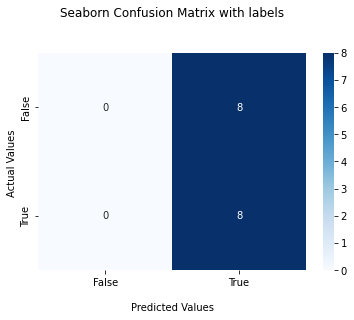

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yval['trueval1'], result['output'])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class pneumonia', 'class normal']
print(classification_report(yval['trueval1'], result['output'], target_names=target_names))

                 precision    recall  f1-score   support

class pneumonia       0.00      0.00      0.00         8
   class normal       0.50      1.00      0.67         8

       accuracy                           0.50        16
      macro avg       0.25      0.50      0.33        16
   weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a model object
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
import math
import random
import numpy as np

tf.keras.backend.clear_session()  #clear old tf seesion and models
dnnModel = models.Sequential()
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (150*150,), kernel_regularizer='l2'))
# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(80, activation='relu', kernel_regularizer='l2'))
# dropout in hidden layers with weight constraint
dnnModel.add(Dropout(0.2))
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer='l2'))
# dropout in hidden layers with weight constraint
dnnModel.add(Dropout(0.2))
# Layer 4 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu', kernel_regularizer='l2'))
# Layer 5 = hidden layer 
dnnModel.add(layers.Dense(10, activation='relu', kernel_regularizer='l2'))
# Layer 6 = output layer
dnnModel.add(layers.Dense(2, activation='softmax', kernel_regularizer='l2'))

dnnModel.summary()
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
dnnModel.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0, momentum=0.9), loss = 'binary_crossentropy', metrics=['accuracy', 'mse'] )
h  = dnnModel.fit( Xtrain, y_train, batch_size=64, validation_data = (Xtest, y_test), epochs=50,  callbacks=[callback, lrate])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1125050   
                                                                 
 dense_1 (Dense)             (None, 80)                4080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 10)                3

In [ ]:
#prediction
result = dnnModel.predict(Xval)
print(result.shape)

result = pd.DataFrame(result)
result.columns = ['proba1', 'proba2']
result['output'] = result['proba1'].apply(lambda x : 1 if x >= 0.50 else 0)
result.head()

(16, 2)


,proba1,proba2,output
0,0.892324,0.107676,1
1,0.892324,0.107676,1
2,0.892324,0.107676,1
3,0.892324,0.107676,1
4,0.892324,0.107676,1


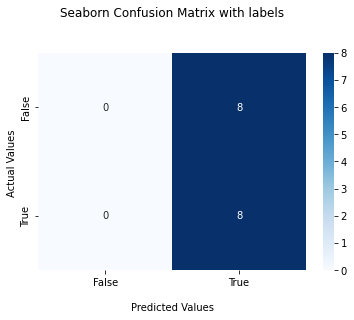

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yval['trueval1'], result['output'])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class pneumonia', 'class normal']
print(classification_report(yval['trueval1'], result['output'], target_names=target_names))

                 precision    recall  f1-score   support

class pneumonia       0.00      0.00      0.00         8
   class normal       0.50      1.00      0.67         8

       accuracy                           0.50        16
      macro avg       0.25      0.50      0.33        16
   weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ***Description on function used in model building***


---


###**Problem Statement: Classification**
###**Output: Binary output**
###**Final activation function: Sigmoid**
###**Loss Funciton: Binary cross entropy/ categorial_crossentropy**


---
### ***ReLU — This results in a numerical value greater than 0***

### ***Sigmoid — This results in a value between 0 and 1 which we can infer to be how confident it is of it being in the class***

### ***Binary Cross Entropy — Cross entropy quantifies the difference between two probability distribution. Our model predicts a model distribution of {p, 1-p} (binary distribution) for each of the classes. We use binary cross-entropy to compare these with the true distributions {y, 1-y} for each class and sum up their results***

**Conclusion:**

**Adam optimization has performed better with training accuracy of 95.63% than Stochastic Gradient Descent (SGD) model with accuracy of 74.0%**